In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [ ]:
data = pd.read_csv('experiment_lesson_4.csv')
df = data.copy()

In [ ]:
df.head(10)

,order_id,delivery_time,district,experiment_group
0,3159,44.0,Purlieus,control
1,10426,51.0,Purlieus,control
2,9155,46.0,Purlieus,control
3,10699,34.0,Purlieus,control
4,10061,43.0,Purlieus,control
5,5535,38.0,Purlieus,control
6,5793,43.0,Purlieus,control
7,3756,36.0,Purlieus,control
8,3394,57.0,Purlieus,control
9,1937,48.0,Purlieus,control


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20196 entries, 0 to 20195
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          20196 non-null  int64  
 1   delivery_time     20196 non-null  float64
 2   district          20196 non-null  object 
 3   experiment_group  20196 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 631.2+ KB


In [ ]:
df.isnull().sum()

,0
order_id,0
delivery_time,0
district,0
experiment_group,0


In [ ]:
df['district'].value_counts()

,count
district,
Purlieus,16960
Central,2396
Suburb,840


##Строим гистрограммы для тестовой и котрольной групп

In [ ]:
#Фильтруем записи по столбцу 'experiment_group'
control_group = df[df['experiment_group'] == 'control']
test_group = df[df['experiment_group'] == 'test']

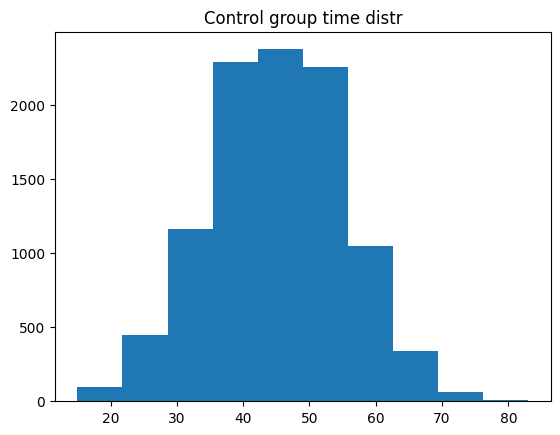

In [ ]:
plt.hist(control_group['delivery_time'])
plt.title('Control group time distr')
plt.show()

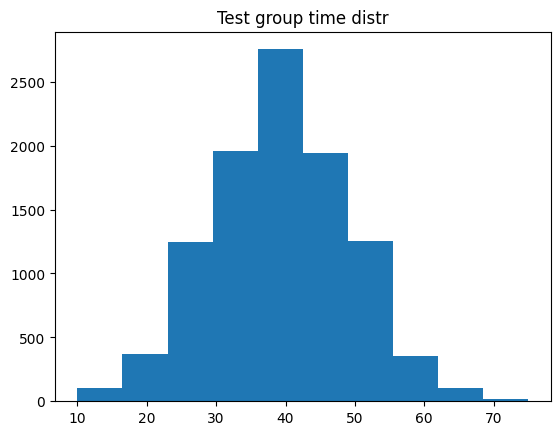

In [ ]:
plt.hist(test_group['delivery_time'])
plt.title('Test group time distr')
plt.show()

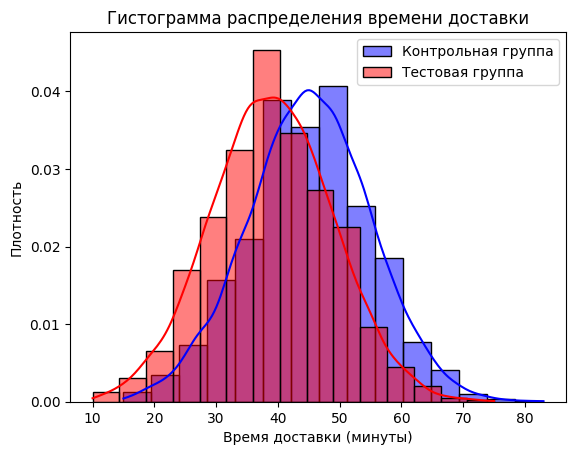

In [ ]:
sns.histplot(control_group['delivery_time'], color='blue', kde=True, label='Контрольная группа', stat='density', bins=15)
sns.histplot(test_group['delivery_time'], color='red', kde=True, label='Тестовая группа', stat='density', bins=15)

plt.legend()
plt.title("Гистограмма распределения времени доставки")
plt.xlabel("Время доставки (минуты)")
plt.ylabel("Плотность")

plt.show()

##Максимумы по времени для групп

In [ ]:
max_control = control_group['delivery_time'].max()
max_test = test_group['delivery_time'].max()

print(f"Максимум контрольной группы: {max_control}")
print(f"Максимум тестовой группы: {max_test}")


Максимум контрольной группы: 83.0
Максимум тестовой группы: 75.0


##Количество наблюдений в разных группах

In [ ]:
count_control = len(control_group)
count_test = len(test_group)
count_diff = abs(count_control - count_test)

print(f'Количество наблюдений в контрольной группе: {count_control}')
print(f'Количество наблюдений в тестовой группе: {count_test}')
print(f'Разница в количестве наблюдений между группами: {count_diff}')

Количество наблюдений в контрольной группе: 10092
Количество наблюдений в тестовой группе: 10104
Разница в количестве наблюдений между группами: 12


In [ ]:
print(scipy.stats.shapiro(control_group['delivery_time']))
print(scipy.stats.shapiro(test_group['delivery_time']))
print(scipy.stats.shapiro(df['delivery_time']))

ShapiroResult(statistic=0.9987088244953138, pvalue=2.8099019608930565e-07)
ShapiroResult(statistic=0.998619400911751, pvalue=1.0739047798223119e-07)
ShapiroResult(statistic=0.9988833255912524, pvalue=1.5832150841014556e-10)


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10092.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10104.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 20196.
  res = hypotest_fun_out(*samples, **kwds)


##Проверяем выборки на нормальность распределения с помощью теста Агостино-Пирсона

H0: данные в выборке распределены нормально  
Ha: данные в выборке не распределены нормально

In [ ]:
print(scipy.stats.normaltest(control_group['delivery_time'].dropna()))
print(scipy.stats.normaltest(test_group['delivery_time'].dropna()))

NormaltestResult(statistic=0.25349755437872584, pvalue=0.8809549607809654)
NormaltestResult(statistic=7.024157092641915, pvalue=0.02983483685333173)


На уровне значимости 0.05 данные по времени в контрольной группе распределены нормально (p value значительно больше уровня значимости, из чего следует, что мы не можем отвергнуть нулевую гипотезу), а данные в тестовой группе распределены не нормально (p value меньше уровня значимости, из чего следует, что мы можем отвергнуть нулевую гипотезу в пользу альтернативной)

##Считаем стандартные отклонения для групп

In [ ]:
control_std = round(control_group['delivery_time'].std(), 2)
test_std = round(test_group['delivery_time'].std(), 2)

print(f'Стандартное отклонение для контрольной группы: {control_std}')
print(f'Стандартное отклонение для тестовой группы: {test_std}')

Стандартное отклонение для контрольной группы: 9.99
Стандартное отклонение для тестовой группы: 9.88


##Рассчитываем статистику критерия

Нулевая гипотеза (H0): Разницы между средним временем доставки в тестовой и контрольной группе нет  
Альтернативная гипотеза (H1): Разница между средним временем доставки в тестовой и контрольной группе есть  
Уровень значимости выбираем равным 0.05

In [ ]:
scipy.stats.ttest_ind(control_group['delivery_time'], test_group['delivery_time'])

TtestResult(statistic=43.03582663183714, pvalue=0.0, df=20194.0)

##Считаем процент измнения среднего времени по группам

In [ ]:
#Считаем средние для групп
control_mean = control_group['delivery_time'].mean()
test_mean = test_group['delivery_time'].mean()

#Вычисляем разницу в процентах
diff_percents = round((test_mean - control_mean) * 100 / control_mean, 2)
print(f'На {diff_percents}%')

На -13.35%


##Выводы

Научный: на уровне значимости 0.05 мы  отвергаем нулевую гипотезу (Нулевая гипотеза (H0): Разницы между средним временем доставки в тестовой и контрольной группе нет) в пользу альтернативной (Альтернативная гипотеза (H1): Разница между средним временем доставки в тестовой и контрольной группе есть). Стат значимая разнгость в среднем времени доставки на уровне значимости 0.05 есть

Понятный человеку: новый алгоритм доставок "по пути домой" уменьшил среднее время доставок в тестовой группе по сравнению с контрольной